In [122]:
import pandas as pd
import gzip
import json
import os
import shutil
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
def load_gzipped_json_objects(file_path):
    data = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.json_normalize(data)


receipts_file_path = '/content/receipts.json.gz'
users_file_path = '/content/users.json.gz'
brands_file_path = '/content/brands.json.gz'


receipts = load_gzipped_json_objects(receipts_file_path)
users = load_gzipped_json_objects(users_file_path)
brands = load_gzipped_json_objects(brands_file_path)


In [124]:
users.head()

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12


In [125]:
users.columns

Index(['active', 'role', 'signUpSource', 'state', '_id.$oid',
       'createdDate.$date', 'lastLogin.$date'],
      dtype='object')

In [126]:
print(users.shape)
print(users.dtypes)

(495, 7)
active                  bool
role                  object
signUpSource          object
state                 object
_id.$oid              object
createdDate.$date      int64
lastLogin.$date      float64
dtype: object


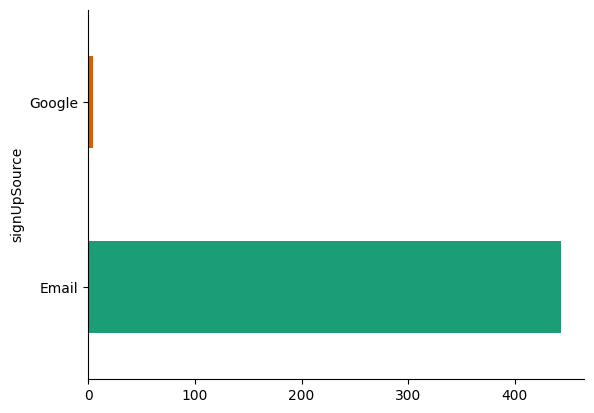

In [127]:
users.groupby('signUpSource').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

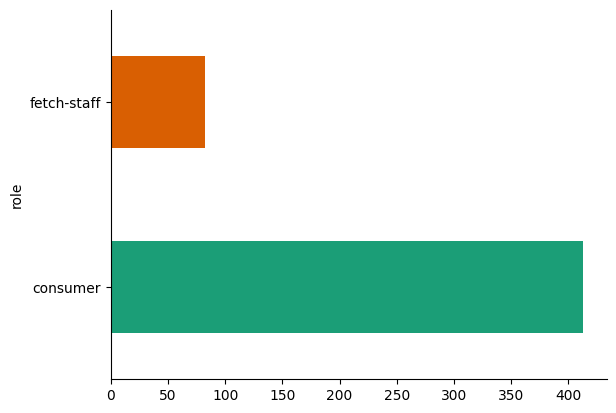

In [128]:
users.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

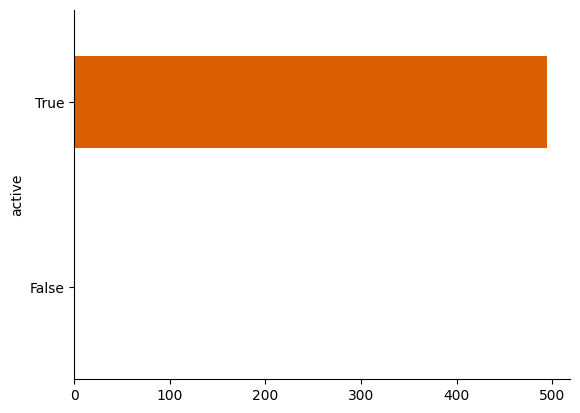

In [129]:
users.groupby('active').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [130]:
brands.head()

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


In [131]:
print(brands.shape)
print(brands.dtypes)

(1167, 9)
barcode         object
category        object
categoryCode    object
name            object
topBrand        object
_id.$oid        object
cpg.$id.$oid    object
cpg.$ref        object
brandCode       object
dtype: object


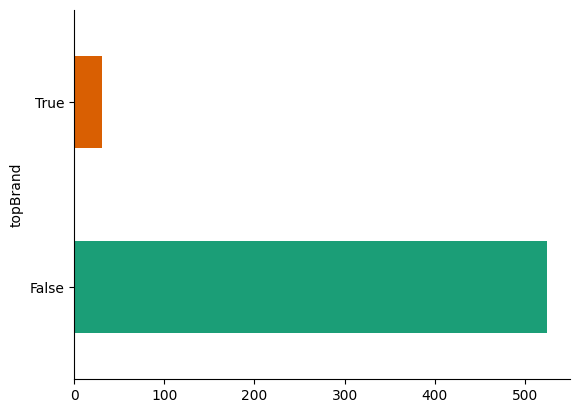

In [133]:
brands.groupby('topBrand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [134]:
receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


In [135]:
print(receipts.shape)
print(receipts.dtypes)

(1119, 15)
bonusPointsEarned          float64
bonusPointsEarnedReason     object
pointsEarned                object
purchasedItemCount         float64
rewardsReceiptItemList      object
rewardsReceiptStatus        object
totalSpent                  object
userId                      object
_id.$oid                    object
createDate.$date             int64
dateScanned.$date            int64
finishedDate.$date         float64
modifyDate.$date             int64
pointsAwardedDate.$date    float64
purchaseDate.$date         float64
dtype: object


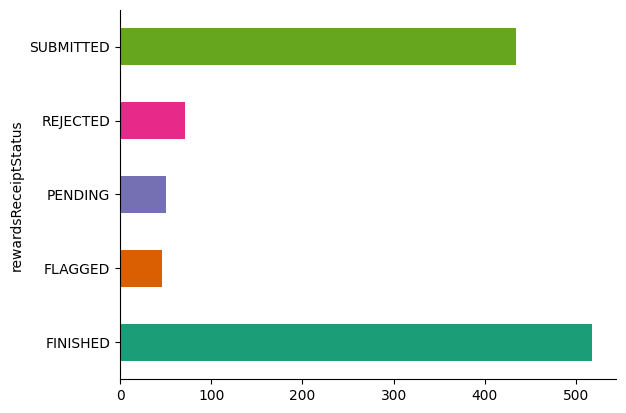

In [136]:
receipts.groupby('rewardsReceiptStatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

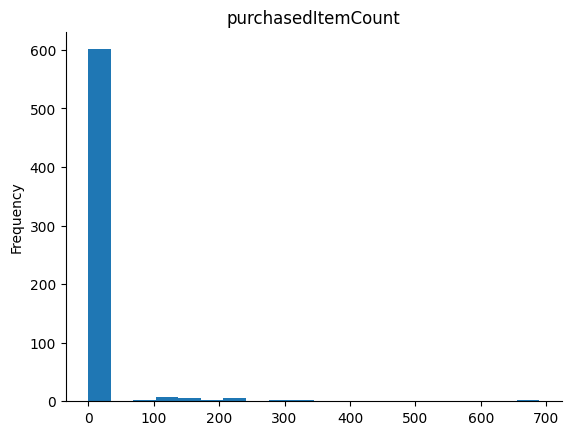

In [137]:
receipts['purchasedItemCount'].plot(kind='hist', bins=20, title='purchasedItemCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

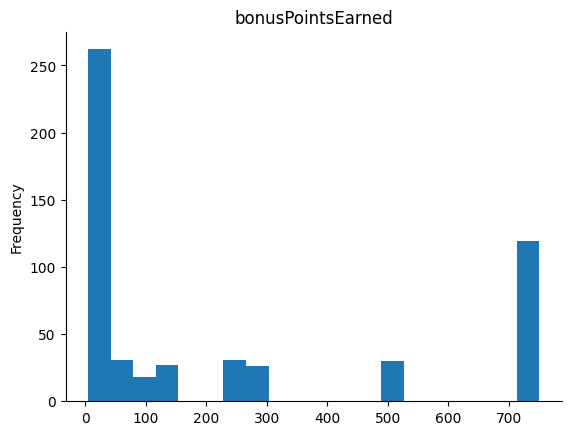

In [138]:
receipts['bonusPointsEarned'].plot(kind='hist', bins=20, title='bonusPointsEarned')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Creating new table called rewarditem from Receipt table's 'rewardsReceiptItemList'

In [139]:
all_items = []

for index, itemList in receipts['rewardsReceiptItemList'].dropna().iteritems():
    receipt_id = receipts.loc[index, '_id.$oid'] # Get the corresponding receipt ID
    for item in itemList:
        item['oid'] = receipt_id # Assign receipt ID to each item
        all_items.append(item)

rewarditem = pd.DataFrame(all_items)

df_receipts = receipts.drop(columns=['rewardsReceiptItemList'])


<ipython-input-139-ba5ffc7926a9>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, itemList in receipts['rewardsReceiptItemList'].dropna().iteritems():


In [104]:
rewarditem.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
rewarditem.dtypes

barcode                                object
description                            object
finalPrice                             object
itemPrice                              object
needsFetchReview                       object
partnerItemId                          object
preventTargetGapPoints                 object
quantityPurchased                     float64
userFlaggedBarcode                     object
userFlaggedNewItem                     object
userFlaggedPrice                       object
userFlaggedQuantity                   float64
oid                                    object
needsFetchReviewReason                 object
pointsNotAwardedReason                 object
pointsPayerId                          object
rewardsGroup                           object
rewardsProductPartnerId                object
userFlaggedDescription                 object
originalMetaBriteBarcode               object
originalMetaBriteDescription           object
brandCode                         

##Change date format in every table

In [84]:
def convert_datetime(df, col):
    # Convert integer timestamp, milliseconds to datetime
    df[col] = pd.to_datetime(df[col], unit='ms', errors='coerce')
    return df




In [140]:
date_cols = [
    'createDate.$date', 'dateScanned.$date', 'finishedDate.$date',
    'modifyDate.$date', 'pointsAwardedDate.$date', 'purchaseDate.$date'
]

for col in date_cols:
    receipts = convert_datetime(receipts, col)

In [141]:
cols = ['createdDate.$date','lastLogin.$date']
for col in cols:
       users=convert_datetime(users,col)

##checking for duplicates

In [142]:
# Check for uniqueness in the user_id column
is_unique_users = users['_id.$oid'].is_unique
print(f"user_id is unique in Users: {is_unique_users}")

# Check for uniqueness in the receipt_id column
is_unique_receipts = receipts['_id.$oid'].is_unique
print(f"receipt_id is unique in Receipts: {is_unique_receipts}")

# Check for uniqueness in the barcode column
is_unique_brands = brands['barcode'].is_unique
print(f"barcode is unique in Brands: {is_unique_brands}")


user_id is unique in Users: False
receipt_id is unique in Receipts: True
barcode is unique in Brands: False


In [143]:
# Count of unique user_id values
unique_user_id_count = users['_id.$oid'].nunique()
total_user_rows = len(users)
print(f"Unique user_id count: {unique_user_id_count}, Total user rows: {total_user_rows}")



Unique user_id count: 212, Total user rows: 495


In [144]:
unique_barcode_count = brands['barcode'].nunique()
total_brands_rows = len(brands)
print(f"Unique brands count: {unique_barcode_count}, Total brands rows: {total_brands_rows}")

Unique brands count: 1160, Total brands rows: 1167


In [145]:
duplicates = users[users.duplicated(keep=False)]
print("Exact duplicates:\n", duplicates)

Exact duplicates:
      active         role signUpSource state                  _id.$oid  \
0      True     consumer        Email    WI  5ff1e194b6a9d73a3a9f1052   
1      True     consumer        Email    WI  5ff1e194b6a9d73a3a9f1052   
2      True     consumer        Email    WI  5ff1e194b6a9d73a3a9f1052   
3      True     consumer        Email    WI  5ff1e1eacfcf6c399c274ae6   
4      True     consumer        Email    WI  5ff1e194b6a9d73a3a9f1052   
..      ...          ...          ...   ...                       ...   
490    True  fetch-staff          NaN   NaN  54943462e4b07e684157a532   
491    True  fetch-staff          NaN   NaN  54943462e4b07e684157a532   
492    True  fetch-staff          NaN   NaN  54943462e4b07e684157a532   
493    True  fetch-staff          NaN   NaN  54943462e4b07e684157a532   
494    True  fetch-staff          NaN   NaN  54943462e4b07e684157a532   

          createdDate.$date         lastLogin.$date  
0   2021-01-03 15:24:04.800 2021-01-03 15:25:37.85

In [146]:
duplicates = brands[brands.duplicated(keep=False)]
print("Exact duplicates:\n", duplicates)

Exact duplicates:
 Empty DataFrame
Columns: [barcode, category, categoryCode, name, topBrand, _id.$oid, cpg.$id.$oid, cpg.$ref, brandCode]
Index: []


## Checking for missing values

In [147]:
# Percentage of missing values in receipt table
missing_values_percent = (receipts.isnull().sum() / len(receipts)) * 100
print(missing_values_percent)


bonusPointsEarned          51.385165
bonusPointsEarnedReason    51.385165
pointsEarned               45.576408
purchasedItemCount         43.252904
rewardsReceiptItemList     39.320822
rewardsReceiptStatus        0.000000
totalSpent                 38.873995
userId                      0.000000
_id.$oid                    0.000000
createDate.$date            0.000000
dateScanned.$date           0.000000
finishedDate.$date         49.240393
modifyDate.$date            0.000000
pointsAwardedDate.$date    52.010724
purchaseDate.$date         40.035746
dtype: float64


In [148]:
# Percentage of missing values in user table
missing_values_percent = (users.isnull().sum() / len(users)) * 100
print(missing_values_percent)

active                0.000000
role                  0.000000
signUpSource          9.696970
state                11.313131
_id.$oid              0.000000
createdDate.$date     0.000000
lastLogin.$date      12.525253
dtype: float64


In [149]:
# Percentage of missing values in brand table
missing_values_percent = (brands.isnull().sum() / len(brands)) * 100
print(missing_values_percent)

barcode          0.000000
category        13.281919
categoryCode    55.698372
name             0.000000
topBrand        52.442159
_id.$oid         0.000000
cpg.$id.$oid     0.000000
cpg.$ref         0.000000
brandCode       20.051414
dtype: float64
